### Suleimenova Madina

### Midterm Project

In [1]:
# libs that I used
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [2]:
# First of all we need to load our dataset
data = pd.read_excel('C:\\Users\\sulej\\OneDrive\\Рабочий стол\\7 semester\\Data Mining\\Online Retail.xlsx')

In [3]:
# Lets see our data
print(data.head())

# Now we can start cleaning our dataset
# We can drop duplicates
data.drop_duplicates(inplace=True)

# Now lets see is there any missing values 
print(data.isnull().sum())

# As we see there are a lot of missing data in CustomerID column, we need to delete them
data.dropna(subset=['CustomerID'], inplace=True)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [4]:
# Now we can encode some categorical variables 
data['Country'] = LabelEncoder().fit_transform(data['Country'])

# Also I think we need to create TotalPrice => (Quantity * UnitPrice)
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# We can scale numerical features
scaler = StandardScaler()
data[['Quantity', 'TotalPrice']] = scaler.fit_transform(data[['Quantity', 'TotalPrice']])

# And remove outliers
data = data[data['Quantity'] > 0]

print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65823 entries, 9 to 541892
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    65823 non-null  object        
 1   StockCode    65823 non-null  object        
 2   Description  65823 non-null  object        
 3   Quantity     65823 non-null  float64       
 4   InvoiceDate  65823 non-null  datetime64[ns]
 5   UnitPrice    65823 non-null  float64       
 6   CustomerID   65823 non-null  float64       
 7   Country      65823 non-null  int32         
 8   TotalPrice   65823 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(1), object(3)
memory usage: 4.8+ MB
None


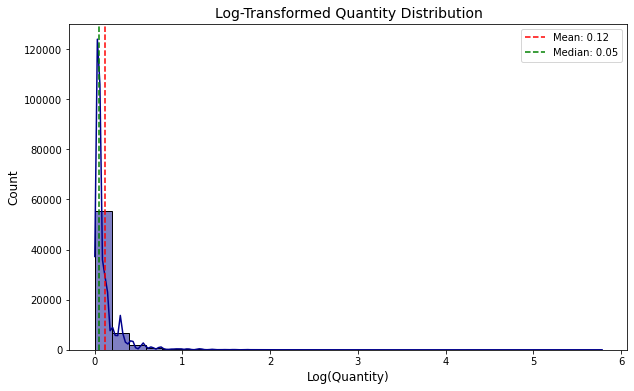

In [5]:
# Now we can visualize our data
plt.figure(figsize=(10, 6))

# Apply a log transformation to Quantity to handle the skewed distribution
sns.histplot(np.log1p(data['Quantity']), bins=30, color='darkblue', kde=True)

plt.title('Log-Transformed Quantity Distribution', fontsize=14)
plt.xlabel('Log(Quantity)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding mean and median annotations
mean_value = np.mean(np.log1p(data['Quantity']))
median_value = np.median(np.log1p(data['Quantity']))
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
plt.legend()

plt.show()

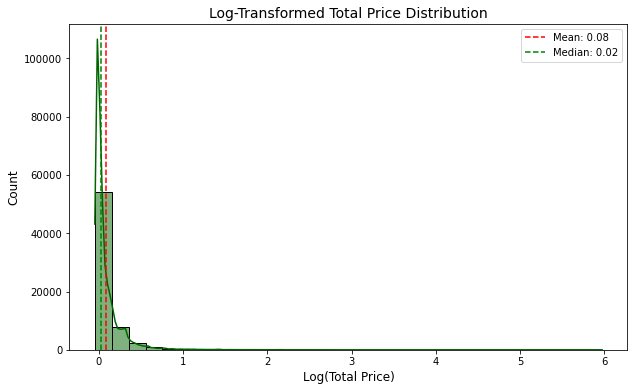

In [6]:
# Log scale for Total Price
plt.figure(figsize=(10, 6))

# Apply log transformation to deal with skewness
sns.histplot(np.log1p(data['TotalPrice']), bins=30, color='darkgreen', kde=True)

plt.title('Log-Transformed Total Price Distribution', fontsize=14)
plt.xlabel('Log(Total Price)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding mean and median annotations
mean_value = np.mean(np.log1p(data['TotalPrice']))
median_value = np.median(np.log1p(data['TotalPrice']))
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
plt.legend()

plt.show()


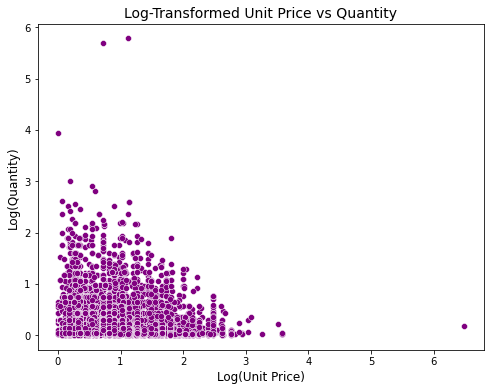

In [7]:
# Scatter plot for Unit Price vs Quantity with log scale
plt.figure(figsize=(8, 6))

# Apply log transformation to UnitPrice and Quantity
sns.scatterplot(x=np.log1p(data['UnitPrice']), y=np.log1p(data['Quantity']), data=data, color='purple')

plt.title('Log-Transformed Unit Price vs Quantity', fontsize=14)
plt.xlabel('Log(Unit Price)', fontsize=12)
plt.ylabel('Log(Quantity)', fontsize=12)

plt.show()

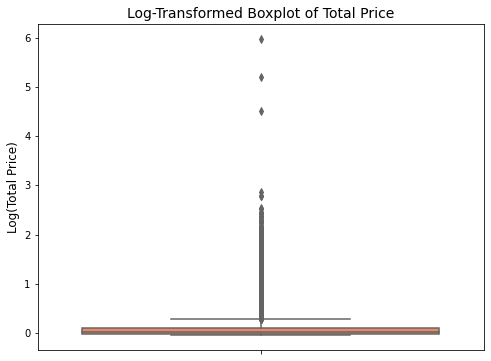

In [8]:
# Box plot for Total Price with y-axis limit
plt.figure(figsize=(8, 6))

# Apply log transformation to TotalPrice to manage skewness
sns.boxplot(y=np.log1p(data['TotalPrice']), color='coral')

plt.title('Log-Transformed Boxplot of Total Price', fontsize=14)
plt.ylabel('Log(Total Price)', fontsize=12)

plt.show()

Summaries
Quantity Distribution
The original histogram for Quantity was highly skewed with most of the values concentrated near zero and a few outliers at high quantities.
After applying a log transformation, the plot becomes more informative. Most transactions involve small quantities, while the distribution spreads out more smoothly across a larger range of values.
The mean and median lines show that the data is still skewed, but much easier to interpret.
Total Price Distribution
Similar to Quantity, TotalPrice is skewed, with the majority of transactions having small total prices and a few extreme outliers.
After log transformation, the distribution is more spread out, revealing that the majority of transactions fall within a more reasonable range. The mean and median lines help identify the central tendency of the data.
Scatter Plot: Unit Price vs Quantity
The original scatter plot shows most data points clustered around low values for both UnitPrice and Quantity, with outliers difficult to see.
By applying log transformations, the scatter plot becomes more balanced. This transformation spreads out the data points, revealing possible trends and making it easier to analyze the relationship between UnitPrice and Quantity.
Box Plot for Total Price
The original box plot is heavily skewed, with a few very large TotalPrice values pushing most of the data into a narrow range near the bottom.
Using a log transformation helps flatten the outliers and brings the majority of the data into view. This shows the interquartile range (IQR) more clearly and makes it easier to spot potential outliers without distorting the plot.

In [9]:
# I want to make RFM
# import datetime as dt
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create a snapshot date
snapshot_date = max(data['InvoiceDate']) + dt.timedelta(days=1)

# Recency => Days since last purchase
data['Recency'] = (snapshot_date - data.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

# Frequency => Number of purchases
data['Frequency'] = data.groupby('CustomerID')['InvoiceNo'].transform('nunique')

# Monetary => Total spending by customer
data['Monetary'] = data.groupby('CustomerID')['TotalPrice'].transform('sum')

# Drop duplicates for customer-based analysis
rfm_data = data[['CustomerID', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()

# Dimensionality Reduction with PCA
# Standardize the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Apply PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

print('Explained variance ratio:', pca.explained_variance_ratio_)


Explained variance ratio: [0.51564727 0.3138799 ]


In [10]:
X = data[['Quantity', 'TotalPrice', 'Recency', 'Frequency', 'Monetary']]
y = data['Country']

# creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lets create logistic regression
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier

# Initialize model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_clf.predict(X_test)

# Evaluate model
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


C:\Users\sulej\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8708697303456133
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       135
           1       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        65
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        35
          10       1.00      0.66      0.80       364
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        39
          13       0.00      0.00      0.00       322
          14       0.00      0.00      0.00       401
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00        2

C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy (Decision Tree): 0.9952145841245728
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       135
           1       0.64      0.82      0.72        11
           3       0.91      0.97      0.94        65
           4       1.00      1.00      1.00         1
           5       0.92      1.00      0.96        11
           6       1.00      1.00      1.00        22
           7       0.94      0.89      0.92        19
           8       1.00      1.00      1.00         2
           9       0.97      0.89      0.93        35
          10       1.00      1.00      1.00       364
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00        39
          13       0.99      0.98      0.99       322
          14       0.97      0.99      0.98       401
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00        10
          17       1.00      1.00   

C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate model
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.9923281428028864
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       135
           1       1.00      0.45      0.62        11
           3       0.95      0.94      0.95        65
           4       1.00      1.00      1.00         1
           5       1.00      0.91      0.95        11
           6       1.00      0.91      0.95        22
           7       1.00      0.84      0.91        19
           8       1.00      0.50      0.67         2
           9       0.91      0.89      0.90        35
          10       1.00      1.00      1.00       364
          11       1.00      1.00      1.00         1
          12       1.00      0.90      0.95        39
          13       1.00      0.96      0.98       322
          14       0.99      0.93      0.96       401
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00        10
          17       1.00      1.00   

C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

# Initialize model
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate model
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier

# Initialize model
nn_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_clf.fit(X_train, y_train)

# Predictions
y_pred_nn = nn_clf.predict(X_test)

# Evaluate model
print("Accuracy (Neural Network):", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

In [ ]:
# accuracy, precision, recall for each model and compare
from sklearn.metrics import precision_score, recall_score

models = {
    'Logistic Regression': log_reg,
    'Decision Tree': tree_clf,
    'Random Forest': rf_clf,
    'SVM': svm_clf,
    'Neural Network': nn_clf
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print("\n")
